## Estimation of obesity levels based on health habits

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [43]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [44]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [46]:
print(df['NObeyesdad'])

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object


### No null values

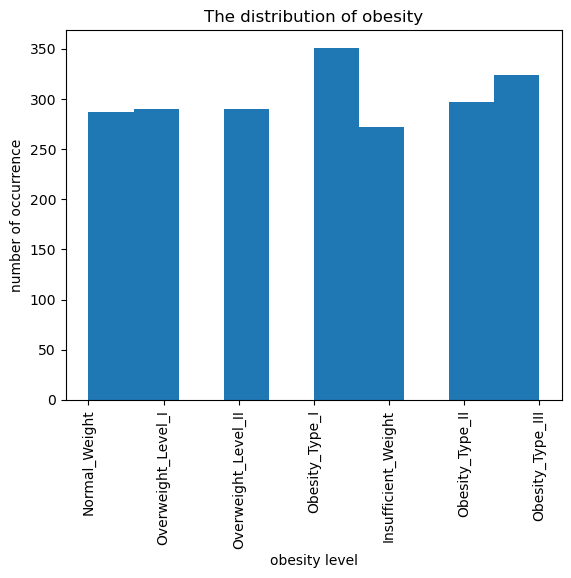

In [47]:
plt.hist(df.NObeyesdad)
plt.title("The distribution of obesity")
plt.xlabel("obesity level")
plt.xticks(rotation=90)
plt.ylabel("number of occurrence")
plt.show()

#### Graph of weight shows somewhat uniform distribution

## Feature engineering with one-hot encoding

In [48]:
df_encoded = pd.concat([df, pd.get_dummies(df["Gender"], drop_first=True)], axis=1)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df["family_history_with_overweight"], drop_first=True)], axis=1)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df["FAVC"], drop_first=True)], axis=1)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df["CAEC"], drop_first=True)], axis=1)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df["SMOKE"], drop_first=True)], axis=1)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df["SCC"], drop_first=True)], axis=1)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df["CALC"], drop_first=True)], axis=1)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df["MTRANS"], drop_first=True)], axis=1)

# Drop the character columns
df_encoded.drop(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], axis = 1, inplace = True)

# Encode the target column
df_encoded.loc[df_encoded['NObeyesdad'] == 'Insufficient_Weight', 'NObeyesdad'] = 0
df_encoded.loc[df_encoded['NObeyesdad'] == 'Normal_Weight', 'NObeyesdad'] = 1
df_encoded.loc[df_encoded['NObeyesdad'] == 'Overweight_Level_I', 'NObeyesdad'] = 2
df_encoded.loc[df_encoded['NObeyesdad'] == 'Overweight_Level_II', 'NObeyesdad'] = 3
df_encoded.loc[df_encoded['NObeyesdad'] == 'Obesity_Type_I', 'NObeyesdad'] = 4
df_encoded.loc[df_encoded['NObeyesdad'] == 'Obesity_Type_II', 'NObeyesdad'] = 5
df_encoded.loc[df_encoded['NObeyesdad'] == 'Obesity_Type_III', 'NObeyesdad'] = 6

df_encoded.head(10)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Male,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,1,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,1,...,0,0,0,0,1,0,0,0,1,0
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,0
6,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
7,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0,1,1,...,0,0,0,0,1,0,0,0,1,0
8,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
9,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0,1,1,...,0,0,0,0,0,1,0,0,1,0


## Data preparation
Data separation as x and y

In [72]:
y = df_encoded['NObeyesdad']
y

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: object

In [73]:
x = df_encoded.drop('NObeyesdad', axis = 1)
x

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Male,yes,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,...,0,0,0,0,1,0,0,0,1,0


## Data Splitting

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [52]:
x_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Male,yes,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
2031,26.000000,1.634894,111.946321,3.000000,3.000000,2.737353,0.000000,0.076094,0,1,...,0,0,0,0,1,0,0,0,1,0
97,21.000000,1.520000,42.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0,0,...,0,0,0,0,1,0,0,0,1,0
864,23.245408,1.707968,75.383716,2.562100,3.105007,1.172427,0.184917,0.923082,1,1,...,0,0,0,0,1,0,0,0,1,0
1955,26.000000,1.639251,111.927001,3.000000,3.000000,2.675567,0.000000,0.081929,0,1,...,0,0,0,0,1,0,0,0,1,0
561,17.082867,1.640824,43.365005,2.815157,3.000000,2.911187,2.595128,1.380204,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,17.000000,1.750000,70.000000,2.000000,3.000000,1.000000,3.000000,2.000000,1,1,...,0,0,0,0,1,0,0,0,0,1
1930,25.982113,1.627818,105.428628,3.000000,3.000000,1.480750,0.098043,0.663492,0,1,...,0,0,0,0,1,0,0,0,1,0
79,23.000000,1.650000,60.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1,1,...,0,0,0,0,1,0,0,0,1,0
1859,25.943827,1.629491,104.839068,3.000000,3.000000,2.209790,0.114698,0.604422,0,1,...,0,0,0,0,1,0,0,0,1,0


In [53]:
x_test

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Male,yes,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
785,16.172992,1.603842,65.000000,2.543563,1.000000,2.000000,0.694281,1.056911,0,1,...,0,0,1,0,1,0,0,0,1,0
1838,20.989016,1.807340,155.872093,3.000000,3.000000,2.417122,0.952725,0.573958,0,1,...,0,0,0,0,1,0,0,0,1,0
2083,24.469756,1.663341,113.077187,3.000000,3.000000,2.632224,0.300964,0.269560,0,1,...,0,0,0,0,1,0,0,0,1,0
1105,22.675679,1.823765,96.945262,1.588782,2.601675,2.469469,1.736538,1.886855,1,1,...,0,0,0,0,1,0,0,0,1,0
361,40.000000,1.560000,80.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,22.000000,1.610000,63.000000,3.000000,3.000000,3.000000,1.000000,0.000000,0,1,...,0,0,0,0,0,1,0,0,1,0
767,19.623574,1.818226,85.833029,2.954996,3.714833,2.430918,2.545931,0.469735,1,1,...,0,0,0,0,1,0,0,0,1,0
2002,21.282530,1.761773,133.903469,3.000000,3.000000,2.893062,1.408177,0.807457,0,1,...,0,0,0,0,1,0,0,0,1,0
116,15.000000,1.650000,86.000000,3.000000,3.000000,1.000000,3.000000,2.000000,0,1,...,0,0,0,0,0,1,0,0,0,1


In [54]:
y_train

2031    6
97      0
864     2
1955    6
561     0
       ..
350     1
1930    6
79      1
1859    6
1544    5
Name: NObeyesdad, Length: 1688, dtype: object

In [55]:
y_test

785     2
1838    6
2083    6
1105    3
361     4
       ..
223     1
767     2
2002    6
116     4
1988    6
Name: NObeyesdad, Length: 423, dtype: object

In [14]:
print(x_train.shape)
print(y_train.shape)

(1688, 23)
(1688,)


In [56]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 2031 to 1544
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1688 non-null   float64
 1   Height                 1688 non-null   float64
 2   Weight                 1688 non-null   float64
 3   FCVC                   1688 non-null   float64
 4   NCP                    1688 non-null   float64
 5   CH2O                   1688 non-null   float64
 6   FAF                    1688 non-null   float64
 7   TUE                    1688 non-null   float64
 8   Male                   1688 non-null   uint8  
 9   yes                    1688 non-null   uint8  
 10  yes                    1688 non-null   uint8  
 11  Frequently             1688 non-null   uint8  
 12  Sometimes              1688 non-null   uint8  
 13  no                     1688 non-null   uint8  
 14  yes                    1688 non-null   uint8  
 15  y

In [57]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## SVM model

In [67]:
X = x.rename(str,axis="columns")


In [59]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x,y)

SVR()

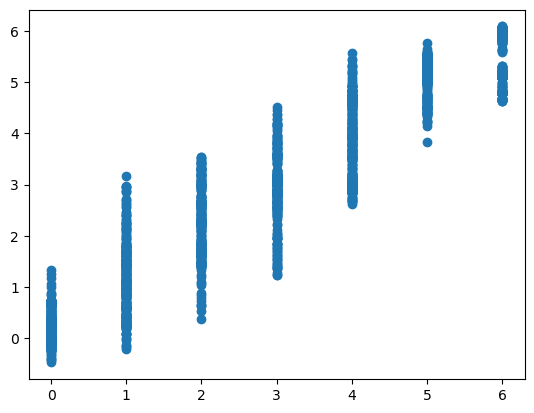

In [60]:
plt.scatter(y, svr.predict(x))

In [61]:
svr.score(x, y)

0.8889209351875477

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, x, y, cv=5)

array([ 0.66132167,  0.64709501, -0.35221229, -1.33440074, -4.66294963])

## Logistic Regression model

In [63]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train, y_train)

lr_score = lr.score(x_test, y_test)
lr_predictions = lr.predict(x_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.830


/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
lr2 = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=2)
lr.fit(x_train, y_train)

test_score = lr.score(x_test, y_test)
train_score = lr.score(x_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.840047393364929
Score on test data:  0.8297872340425532


/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(x_train, y_train)

test_score = lr_regularized.score(x_test, y_test)
train_score = lr_regularized.score(x_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8613744075829384
Score on test data:  0.8463356973995272


/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')  

# Extract features (X) and target variable (y)
X = df_encoded.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target variable

# Initialize LabelEncoder and transform labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Holdout Validation
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Cross-Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# SVM
svm_cv_scores = cross_val_score(svm_model, X, y_encoded, cv=k_fold, scoring='accuracy')
svm_avg_cv_accuracy = svm_cv_scores.mean()

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

# Logistic Regression Cross-Validation
logistic_cv_scores = cross_val_score(logistic_model, X, y_encoded, cv=k_fold, scoring='accuracy')
logistic_avg_cv_accuracy = logistic_cv_scores.mean()

# Print results
print("Holdout Validation:")
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)

print("\nCross-Validation:")
print("SVM Average CV Accuracy:", svm_avg_cv_accuracy)
print("Logistic Regression Average CV Accuracy:", logistic_avg_cv_accuracy)

/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Holdout Validation:
SVM Accuracy: 0.5650118203309693
Logistic Regression Accuracy: 0.6784869976359338

Cross-Validation:
SVM Average CV Accuracy: 0.5589739280472364
Logistic Regression Average CV Accuracy: 0.6745599587688929


/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/haleyallen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

## Given the size of the data set, it is best to use logistic regression